# Classification Problem

In [19]:
# Loading all required modules at one place
# https://scikit-learn.org/stable/datasets/index.html#openml
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import random 
import numpy as np


## Importing Dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
# checking description of dataset
print(mnist['DESCR'])

# loading data and labels in variables
X, y = mnist['data'], mnist['target']
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

index: 14319


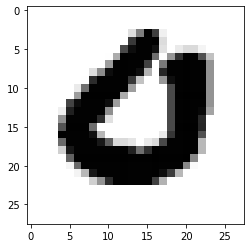

label: 0


In [54]:
# plotting random samples

# get one random sample
index = random.randint(0, 70000)
print(f"index: {index}")

# plot training example
some_digit = X[index]
some_digit_label = y[index]
# print(f"some_digit: {some_digit}")
# -1 indicates that it will automatically adjust the shape as 784/28 = 28
some_digit_image = some_digit.reshape(28, -1)  
plt.imshow(some_digit_image, cmap='binary')
# for more cmap options- https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.show()
print(f"label: {y[index]}")

In [5]:
# check type of label
print(type(y[index]))

# convert type of labels to int
y = y.astype(np.uint8)  # unsigned intger of 8 bits
print(type(y[index]))

<class 'str'>
<class 'numpy.uint8'>


In [6]:
# splitting data into train test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

X_train.shape: (60000, 784)
y_train.shape: (60000,)


# Training a Binary Classifier
If a number is 5 & or not

In [7]:
y_train_5 = (y_train == 5)
print(f"y_train_5.shape: {y_train_5.shape}")
y_test_5 = (y_test == 5)
print(f"y_test_5.shape: {y_test_5.shape}")

y_train_5.shape: (60000,)
y_test_5.shape: (10000,)


Now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradi‐
ent Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier
has the advantage of being capable of handling very large datasets efficiently. This is
in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning), as we will see later. Let’s cre‐
ate an SGDClassifier and train it on the whole training set:

In [8]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
# take 10 random samples for testing
samples_index = random.sample(range(0,10001), 10)
print(samples_index)

[789, 2354, 6880, 6607, 478, 4425, 3415, 4668, 9147, 2467]


In [10]:
# predicting
print(f"Prediction label: {sgd_clf.predict([X_test[i] for i in samples_index])}")
print(f"Actual label: {[y_test_5[i] for i in samples_index]}")
print(f"Label Values: {[y_test[i] for i in samples_index]}")

Prediction label: [False False  True False False False False False False False]
Actual label: [False, False, True, False, True, False, False, False, False, False]
Label Values: [4, 2, 5, 2, 5, 9, 2, 2, 7, 8]


# Performance Measures


## Accuracy

In [11]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds?
This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very
dumb classifier that just classifies every single image in the “not-5” class

In [12]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
print(cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy"))

[0.91125 0.90855 0.90915]


This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).

## Confusion Matrix
Confusion Matrix template in sklearn = $\left( \matrix{ TN & FP \cr FN & TP \cr} \right)$

actual labels along y, predicted labels along x

In [13]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(y_train_pred[:5])

[ True False False False False]


Just like the cross_val_score() function, cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predic‐
tions made on each test fold. This means that you get a clean prediction for each
instance in the training set (“clean” meaning that the prediction is made by a model
that never saw the data during training).

In [14]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

## Precision $=\frac{TP}{TP+FP}$

TP is the number of true positives, and FP is the number of false positives.
A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct (precision = 1/1 = 100%). But this would not be very useful, since
the classifier would ignore all but one positive instance. So precision is typically used
along with another metric named recall, also called sensitivity or the true positive rate
(TPR): this is the ratio of positive instances that are correctly detected by the classifier.

## Recall $=\frac{TP}{TP+FN}$

FN is, of course, the number of false negatives.

In [18]:
# Scikit-Learn provides several functions to compute classifier metrics, including precision and recall:
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


## F1 Score
It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.

$$F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=2 \times \frac{precision\times recall}{precision+recall}=\frac{TP}{TP+\frac{FN+TP}{2}}$$

In [20]:
print(f1_score(y_train_5, y_train_pred))

0.7325171197343846


The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other con‐ texts you really care about recall. For example, if you trained a classifier to detect vid‐ eos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a clas‐ sifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the clas‐ sifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters in surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off.


## Precision/Recall trade-off
To understand this trade-off, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function. If that score is greater than a threshold, it assigns the instance to the positive class; otherwise it assigns it to the negative class. 

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then use any threshold you want to make predictions based on those scores:

In [23]:
y_scores = sgd_clf.decision_function([X[0]])
print(y_scores)

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

# The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
# result as the predict() method (i.e., True). Let’s raise the threshold:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[2164.22030239]
[ True]
[False]


This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 8,000.

How do you decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores[:50])

[  1200.93051237 -26883.79202424 -33072.03475406 -15919.5480689
 -20003.53970191 -16652.87731528 -14276.86944263 -23328.13728948
  -5172.79611432 -13873.5025381  -22112.989794    -2315.51879869
 -29304.06327411 -18276.25416535  -6790.91252517 -16924.86869525
 -24589.95425105 -18278.36420614  -6027.9952283  -22381.6171182
 -49309.77476771 -17839.33188677 -18790.52598692 -17252.40958724
 -15735.74829459 -26564.59912951  -7330.87070698 -29867.39668611
 -55517.28436239 -23393.91582122 -23748.85652153 -38673.64006081
  -9727.17183759 -31510.32108813 -26321.37189264   2128.09444578
 -17549.24805908 -30196.1371314  -27894.21110125 -12411.15070702
 -16150.91103934 -20214.54378109  -7708.78445896 -13618.81181688
 -11098.63132251 -18164.82278546 -16222.80882902   7218.00578357
  -2050.26809833 -19307.4594483 ]


With these scores, use the precision_recall_curve() function to compute precision and recall for all possible thresholds:

In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

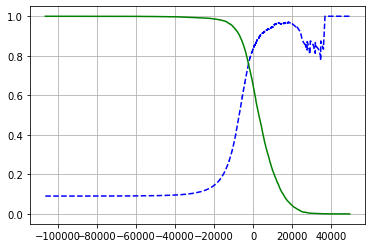

In [27]:
# plot precision and recall as functions of the threshold value
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid()
    plt.show()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

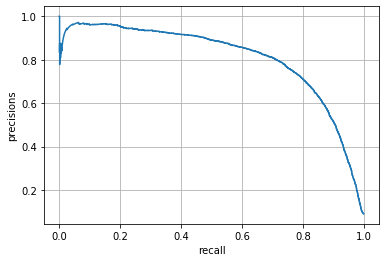

In [31]:
# Another way to select a good precision/recall trade-off is to plot precision directly against recall
plt.plot(recalls, precisions)
plt.xlabel('recall')
plt.ylabel('precisions')
plt.grid()
plt.show()

Precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall trade-off just before that drop—for example, at around 60% recall. But of course, the choice depends on your project.

Suppose you decide to aim for 90% precision. You look up the first plot and find that you need to use a threshold of about 8,000. To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give you the first index of the maximum value, which in this case means the first True value):

In [32]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)

3370.0194991439594


In [33]:
# To make predictions (on the training set for now), instead of calling the classifier’s predict() method, 
# you can run this code:
y_train_pred_90 = (y_scores >= threshold_90_precision)

# checking precision and recall
print(f"precision - {precision_score(y_train_5, y_train_pred_90)}")
print(f"Recall - {recall_score(y_train_5, y_train_pred_90)}")

0.9000345901072293
0.4799852425751706


Great, you have a 90% precision classifier! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. But wait, not so fast. A high-precision classifier is not very useful if its recall is too low!

## The ROC Curve
The **receiver operating characteristic (ROC)** curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the _true positive rate (another name for recall)_ against the _false positive rate (FPR)_. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to *(1 – the true negative rate (TNR))*, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called **specificity**. Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.


In [34]:
# plotting ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

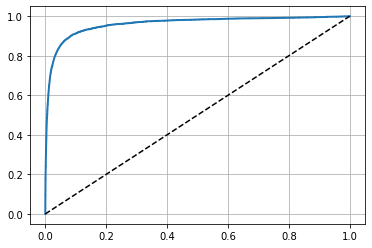

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.grid()
    plt.show()
    
plot_roc_curve(fpr, tpr)

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [37]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9604938554008616


Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC curve. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the topleft corner).

Let’s now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier. First, you need to get scores for each instance in the training set. But due to the way it works, the Random ForestClassifier class does not have a decision_function() method. Instead, it has a predict_proba() method. Scikit-Learn classifiers generally have one or the other, or both. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5):

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
print(y_probas_forest[:5])
print(f"Actual Labels - {y_train_5[:5]}")
print(f"Labels Values - {y_train[:5]}")

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 [1.   0.  ]
 [0.99 0.01]]
Actual Labels - [ True False False False False]
Labels Values - [5 0 4 1 9]


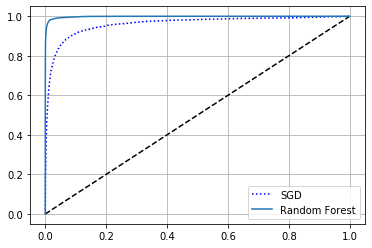

ROC Score- 0.9983436731328145
Precision Score- 0.9905083315756169
Recall Score- 0.8662608374838591


In [51]:
# The roc_curve() function expects labels and scores, but instead of scores you can
# give it class probabilities. Let’s use the positive class’s probability as the score:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

# plotting ROC
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: 
# it comes much closer to the top-left corner
print(f"ROC Score- {roc_auc_score(y_train_5, y_scores_forest)}")
y_preds = y_probas_forest[:,1]>0.5
print(f"Precision Score- {precision_score(y_train_5, y_preds)}")
print(f"Recall Score- {recall_score(y_train_5, y_preds)}")

# Multiclass Classification
Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as SGD classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively. Others (such as Logistic Regression or Support Vector Machine classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification with multiple binary classifiers.

One way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2- detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-the-rest (OvR) strategy (also called one-versus-all).

Another strategy is to train a binary classifier for every pair of digits: one to distin guish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advan tage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set. For these algorithms OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large train‐ ing sets. For most binary classification algorithms, however, OvR is preferred.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvR or OvO, depending on the algorithm. Let’s try this with a Support Vector Machine classifier, using the sklearn.svm.SVC class


In [61]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
print(svm_clf)

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

This code trains the SVC on the training set using the original target classes from 0 to 9 (y_train), instead of the 5-versus-the-rest target classes (y_train_5). Then it makes a prediction (a correct one in this case). Under the hood, Scikit-Learn actually used the OvO strategy: it trained 45 binary classifiers, got their decision scores for the image, and selected the class that won the most duels.
 
If you call the decision_function() method, you will see that it returns 10 scores per instance (instead of just 1). That’s one score per class:

In [55]:
print(svm_clf.predict([some_digit]))

some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)

# checking highest scores
print(f"highest scores corresponding class - {np.argmax(some_digit_scores)}")

# checking classes
print(f"Classes - {svm_clf.classes_}")

# label corresponding to predicted value
print(f"predicted label - {svm_clf.classes_[np.argmax(some_digit_scores)]}")
print(f"Actual label - {some_digit_label}")

[0]
[[ 9.31457844 -0.30634444  6.24991941  2.73877874  5.02194841  3.78688824
   8.26267542  0.72279965  1.72188162  7.25327849]]
highest scores corresponding class - 0
Classes - [0 1 2 3 4 5 6 7 8 9]
predicted label - 0
Actual label - 0


To force Scikit-Learn to use one-versus-one or one-versus-the-rest, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a classifier to its constructor (it does not even have to be a binary classifier). For example, this code creates a multiclass classifier using the OvR strat‐ egy, based on an SVC:

In [63]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(), n_jobs=-1)
ovr_clf.fit(X_train, y_train)
print(f"OVR SVC prediction - {ovr_clf.predict([some_digit])}")
print(f"OVR estimators - {len(ovr_clf.estimators_)}")

# Training an SGDClassifier (or a RandomForestClassifier) is just as easy
sgd_clf.fit(X_train, y_train)
print(f"SGD Predictions - {sgd_clf.predict([some_digit])}")

OVR SVC prediction - [0]
OVR estimators - 10
SGD Predictions - [0]


This time Scikit-Learn did not have to run OvR or OvO because SGD classifiers can directly classify instances into multiple classes. The decision_function() method now returns one value per class. Let’s look at the score that the SGD classifier assigned to each class:

In [64]:
print(sgd_clf.decision_function([some_digit]))

[[ 10345.89409515 -81649.73956315 -15864.93036347 -20776.07937891
  -25461.20179502 -15019.53695063 -34446.49589537 -27962.10645352
   -6053.59692836 -25133.08567367]]


In [71]:
# Now of course you want to evaluate this classifier. As usual, you can use cross-validation. 
# Use the cross_val_score() func‐ tion to evaluate the SGDClassifier’s accuracy:
print(f"CV Score on SGD - {cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')}")

# TRYING OUT SCALING 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cv_score = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print(f'CV Score on SGD scaled data - {cv_score}')

CV Score on SGD - [0.87365 0.85835 0.8689 ]
CV Score on SGD scaled data - [0.8983 0.891  0.9018]


# Error Analysis
First, look at the confusion matrix. You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function, just like you did earlier.

In [72]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


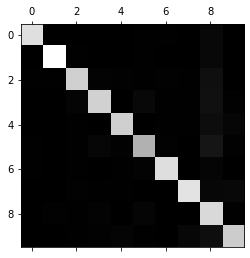

In [73]:
# plotting confusion matrix
# convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow()
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks pretty good, since most images are on the main diagonal, which means that they were classified correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits. In fact, you can verify that both are the case.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors (which would make abundant classes look unfairly bad):


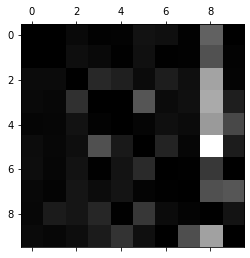

In [84]:
# get rows sum
row_sums = conf_mx.sum(axis=1, keepdims=True)
# print(row_sums)
norm_conf_mx = conf_mx / row_sums
# print(norm_conf_mx)

# Fill the diagonal with zeros to keep only the errors, and plot the result:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

You can clearly see the kinds of errors the classifier makes. Remember that rows represent actual classes, while columns represent predicted classes. The column for class 8 is quite bright, which tells you that many images get misclassified as 8s. However, the row for class 8 is not that bad, telling you that actual 8s in general get properly classified as 8s. As you can see, the confusion matrix is not necessarily symmetrical. You can also see that 3s and 5s often get confused (in both directions).

Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it is failing, but it is more difficult and time-consuming. For example, let’s plot examples of 3s and 5s (the plot_digits() function just uses Matplotlib’s imshow() function; see this chapter’s Jupyter notebook for details):

In [92]:
# EXTRA
import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

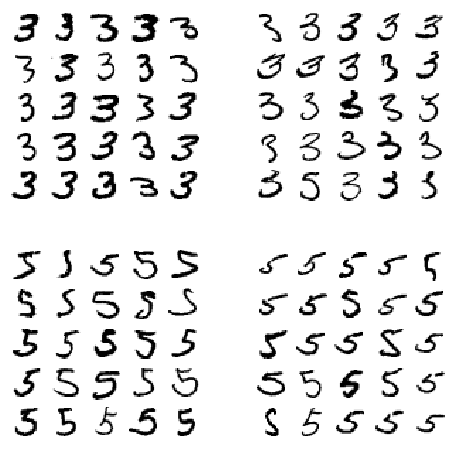

In [93]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

The two 5 × 5 blocks on the left show digits classified as 3s, and the two 5 × 5 blocks on the right show images classified as 5s. Some of the digits that the classifier gets wrong (i.e., in the bottom-left and top-right blocks) are so badly written that even a human would have trouble classifying them (e.g., the 5 in the first row and second column truly looks like a badly written 3). However, most misclassified images seem like obvious errors to us, and it’s hard to understand why the classifier made the mistakes it did.3 The reason is that we used a simple SGDClassifier, which is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s differ only by a few pixels, this model will easily confuse them.

The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, and vice versa. In other words, this classifier is quite sensitive to image shifting and rotation. So one way to reduce the 3/5 confusion would be to preprocess the images to ensure that they are well centered and not too rotated. This will probably help reduce other errors as well. 

# Multilabel Classification
Let's create y_multilabel array containing two target labels for each digit image: the first indicates whether or not the digit is large (7, 8, or 9), and the second indicates whether or not it is odd.

In [95]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]
print(f"Some multilabels:")
print(y_multilabel[:5])

# create a KNeighborsClassifier instance (which supports multilabel classification, 
# though not all classifiers do), and we train it using the multiple targets array
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

# predict
print(f"Predicted label - {knn_clf.predict([X_train[0]])}")
print(f"Multi Label - {y_multilabel[0]}")
print(f"Actual Label - {y_train[0]}")

Some multilabels:
[[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]]
Predicted label - [[False  True]]
Multi Label - [False  True]
Actual Label - 5


There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. One approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score. This code computes the average F1 score across all labels

In [96]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

# Multioutput Classification
The last type of classification task we are going to discuss here is called multioutput–multiclass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

Let’s start by creating the training and test sets by taking the MNIST images and adding noise to their pixel intensities with NumPy’s randint() function. The target images will be the original images:


In [97]:
# adding noise to train data
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

# adding noise to test data
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise


y_train_mod = X_train
y_test_mod = X_test

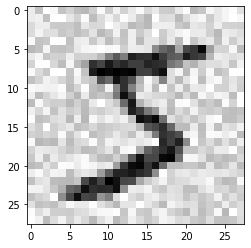

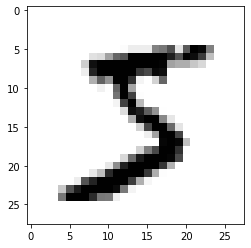

In [98]:
# peeking at a data point
some_digit_image = X_train_mod[0].reshape(28, -1)  
plt.imshow(some_digit_image, cmap='binary')
plt.show()

some_digit_image = y_train_mod[0].reshape(28, -1)  
plt.imshow(some_digit_image, cmap='binary')
plt.show()

In [99]:
# Let’s train the classifier and make it clean this image
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

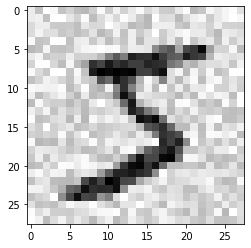

In [100]:
# testing our model
clean_digit = knn_clf.predict([X_test_mod[0]])
some_digit_image = X_train_mod[0].reshape(28, -1)  
plt.imshow(some_digit_image, cmap='binary')
plt.show()